Task A

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train_all_tasks.csv')

df.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


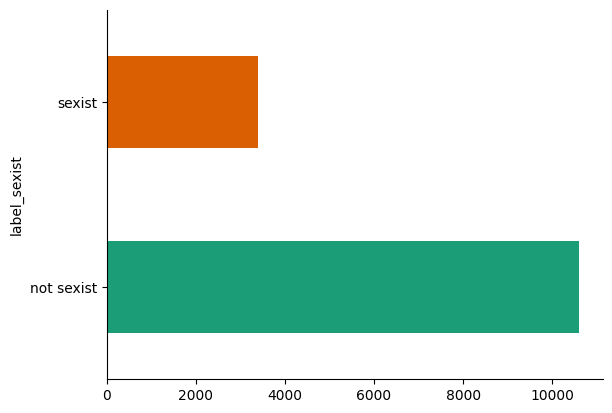

In [ ]:
# @title label_sexist

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label_sexist').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import tensorflow, nltk, re, warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Pre-Processing

In [ ]:
df.isnull().sum()

rewire_id         0
text              0
label_sexist      0
label_category    0
label_vector      0
dtype: int64

Checking for and removing duplicates

In [ ]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(14000, 5)
(14000, 5)


In [ ]:
df['label_sexist'].value_counts()

label_sexist
not sexist    10602
sexist         3398
Name: count, dtype: int64

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

df['text_processed'] = df['text'].apply(preprocess_text)




In [ ]:
df.head()

,rewire_id,text,label_sexist,label_category,label_vector,text_processed
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none,damn writing pretty chaotic
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none,yeah apparently bunch misogynistic virgin one ...
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none,fuck woman still mp
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none,understand know youre right time know isnt eno...
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none,surprized didnt stop rape woman


In [ ]:
df.drop(columns=['text'], inplace=True)


In [ ]:
df.head()

,rewire_id,label_sexist,label_category,label_vector,text_processed
0,sexism2022_english-7358,not sexist,none,none,damn writing pretty chaotic
1,sexism2022_english-2367,not sexist,none,none,yeah apparently bunch misogynistic virgin one ...
2,sexism2022_english-3073,not sexist,none,none,fuck woman still mp
3,sexism2022_english-14895,not sexist,none,none,understand know youre right time know isnt eno...
4,sexism2022_english-4118,not sexist,none,none,surprized didnt stop rape woman


In [ ]:
df['label_sexist'].value_counts()

label_sexist
not sexist    10602
sexist         3398
Name: count, dtype: int64

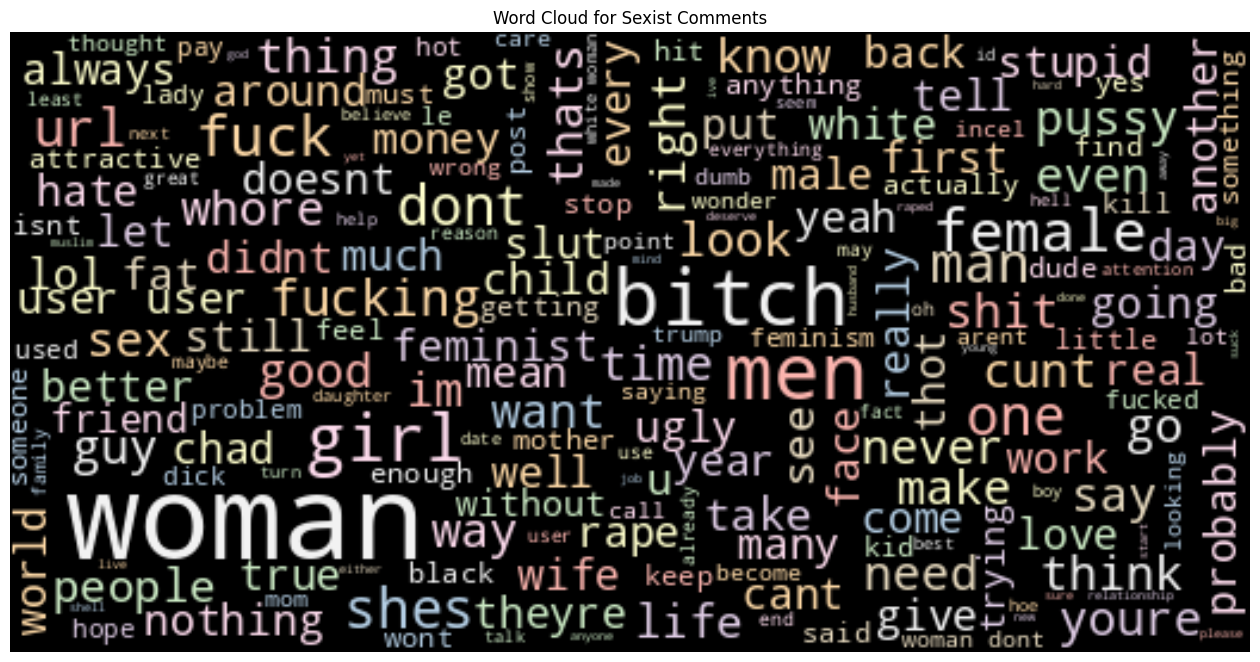

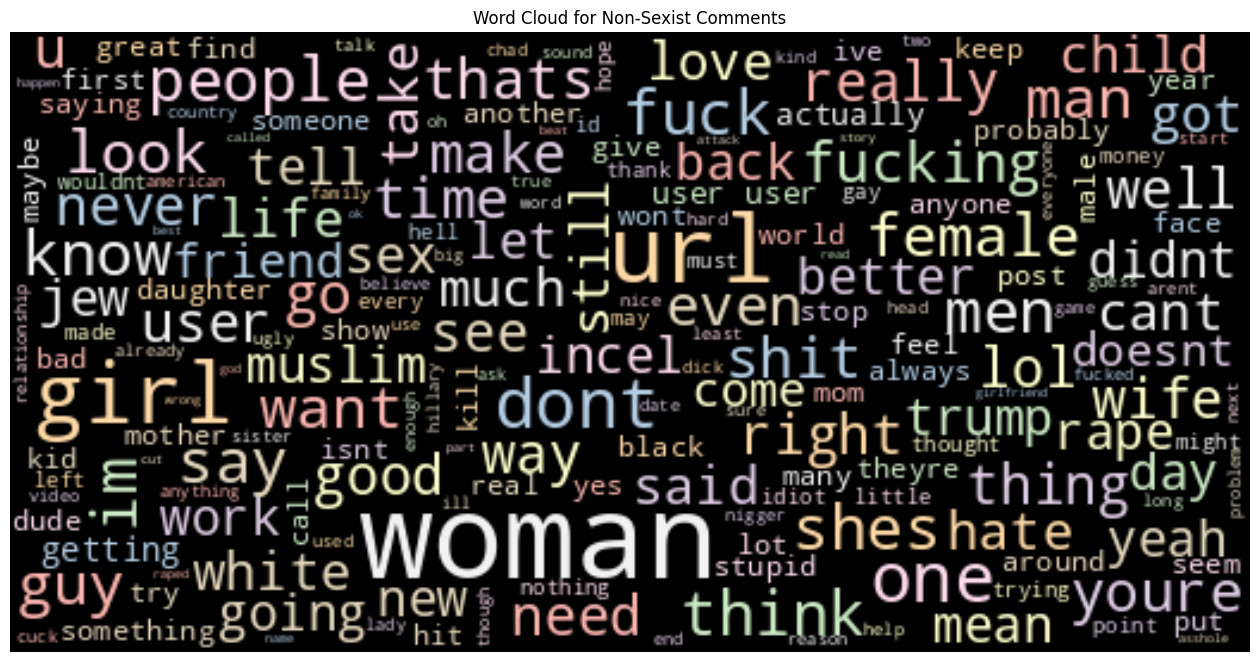

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


sexist_comments_text = " ".join(df[df['label_sexist'] == 'sexist']['text_processed'])


sexist_cloud = WordCloud(width=520, height=260, stopwords=STOPWORDS, max_font_size=50,
                         background_color="black", colormap='Pastel1').generate(sexist_comments_text)


plt.figure(figsize=(16, 10))
plt.imshow(sexist_cloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Sexist Comments')
plt.show()


non_sexist_comments_text = " ".join(df[df['label_sexist'] == 'not sexist']['text_processed'])


non_sexist_cloud = WordCloud(width=520, height=260, stopwords=STOPWORDS, max_font_size=50,
                             background_color="black", colormap='Pastel1').generate(non_sexist_comments_text)


plt.figure(figsize=(16, 10))
plt.imshow(non_sexist_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Sexist Comments')
plt.show()


Text(0.5, 1.0, 'The distribution of positive and negative reviews')

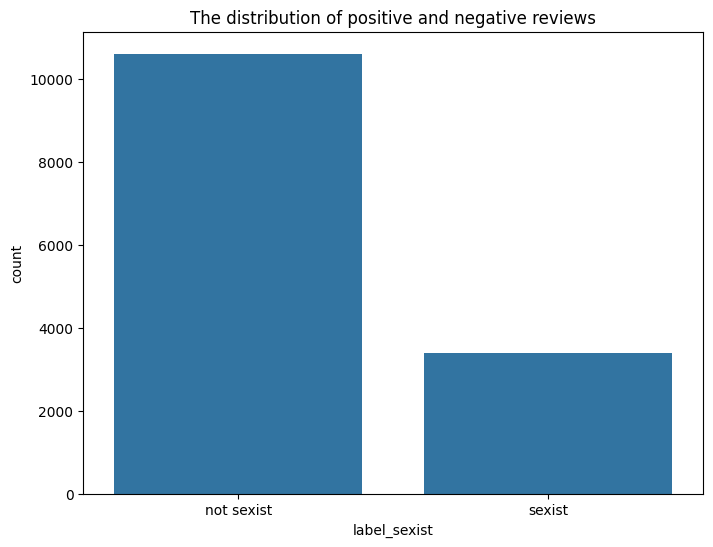

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df, x="label_sexist")
plt.title('The distribution of positive and negative reviews')

# Train Test Split and SMOTE

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X = df['text_processed']
y = df['label_sexist']
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(X)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


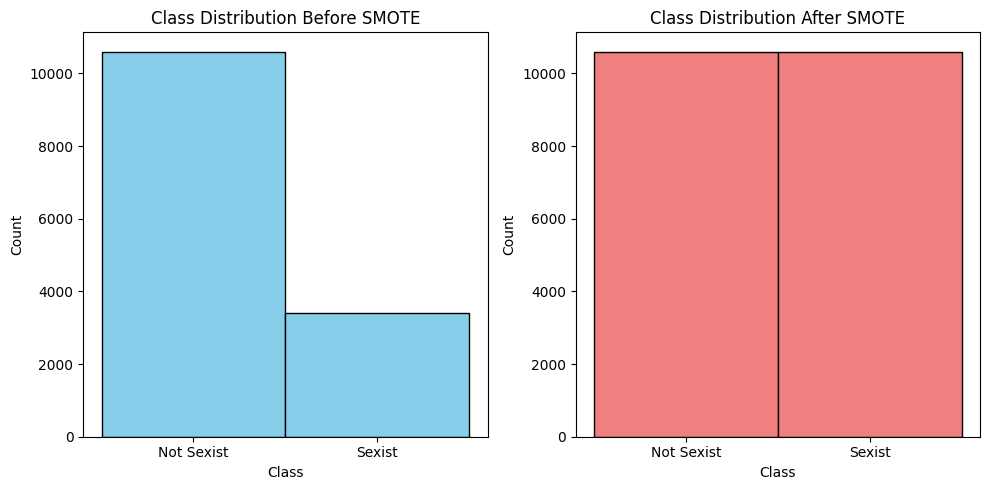

In [ ]:
import matplotlib.pyplot as plt

# Before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y, bins=2, color='skyblue', edgecolor='black')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Sexist', 'Sexist'])

# After SMOTE
plt.subplot(1, 2, 2)
plt.hist(y_resampled, bins=2, color='lightcoral', edgecolor='black')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Sexist', 'Sexist'])

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


X_train, X_test, y_train, y_test = train_test_split(df['text_processed'], df['label_sexist'], test_size=0.3, random_state=42, stratify=df['label_sexist'])


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)


max_sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)


y_train_encoded = np.array(y_train.map(lambda x: 1 if x == 'sexist' else 0))
y_test_encoded = np.array(y_test.map(lambda x: 1 if x == 'sexist' else 0))


def create_bi_lstm_model(vocab_size, embedding_dim, max_sequence_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(units=128)))
    model.add(Dense(units=1, activation='sigmoid'))
    return model


embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
bi_lstm_model = create_bi_lstm_model(vocab_size, embedding_dim, max_sequence_length)
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = bi_lstm_model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = bi_lstm_model.evaluate(X_test_padded, y_test_encoded)
print("Test Accuracy:", accuracy)



Epoch 1/10
245/245 [==============================] - 105s 405ms/step - loss: 0.4888 - accuracy: 0.7874 - val_loss: 0.4103 - val_accuracy: 0.8301
Epoch 2/10
245/245 [==============================] - 95s 390ms/step - loss: 0.2819 - accuracy: 0.8843 - val_loss: 0.4477 - val_accuracy: 0.8189
Epoch 3/10
245/245 [==============================] - 100s 407ms/step - loss: 0.1449 - accuracy: 0.9463 - val_loss: 0.5267 - val_accuracy: 0.7990
Epoch 4/10
132/132 [==============================] - 14s 110ms/step - loss: 0.4283 - accuracy: 0.8319
Test Accuracy: 0.8319047689437866


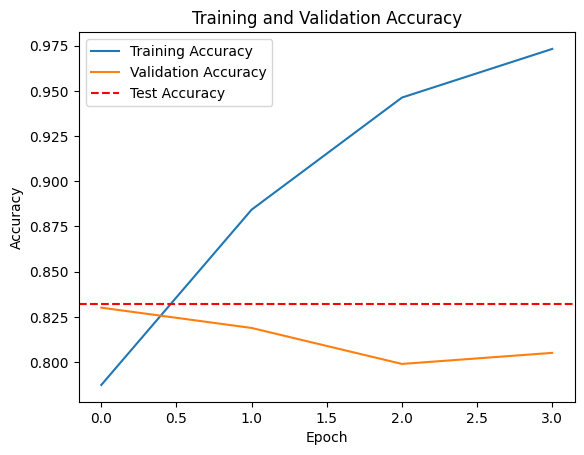

In [ ]:
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']


plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.axhline(y=accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


132/132 [==============================] - 10s 75ms/step
Confusion Matrix:
[[2652  529]
 [ 857  162]]


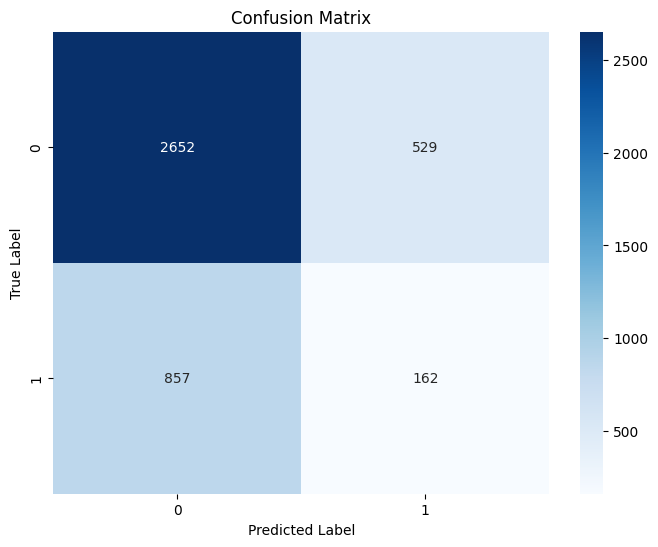

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      3181
           1       0.23      0.16      0.19      1019

    accuracy                           0.67      4200
   macro avg       0.50      0.50      0.49      4200
weighted avg       0.63      0.67      0.65      4200



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_prob = lstm_model.predict(X_test_padded)

y_pred = (y_pred_prob > 0.5).astype(int).flatten()


y_pred = y_pred[:len(y_test_encoded)]


conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))



